In [158]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle as pkl
import os, sys
import numpy as np
from os import listdir
from os.path import isfile, join
import pickle as pkl
sys.path.append("../DetResponse/")
sys.path.append("../Utils/")
sys.path.append("../PDFs/")

from Detector import *
from Plot_Histogram import *
from Signal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:

# Binning:
mass = 1000
# E true
Etrue_center = np.linspace(1., mass, 100)
Ewidth = (mass-1.)/(100.-1.)
Etrue_edges = np.array([E - Ewidth/2. for E in Etrue_center])
Etrue_edges = np.append(Etrue_edges, Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, 51)
Psiwidth = 180./50.
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
# E reco
Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
# Psi reco
Psireco_edges = np.linspace(0., 180., 18+1)
Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

# PID
PID_edges = np.array([0.,0.5,0.85,1.])
PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

Bin = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)

In [160]:
# Building binned Resolution:
MCdict = ExtractMC(['140000'])
# track
loc = np.where((MCdict['nutype']>0.))
psitrue = MCdict["psi_true"][loc]
Etrue = MCdict["E_true"][loc]
psireco = MCdict["psi_reco"][loc]
Ereco = MCdict["E_reco"][loc]
weight = MCdict["w"][loc]

Resobin = np.histogramdd((psitrue, Etrue, psireco, Ereco),
                                           bins = (Psitrue_edges, Etrue_edges, Psireco_edges, Ereco_edges))

# properly normalize the rersolution:
nonnumber = np.array([])
Resobin_norm = np.zeros(Resobin[0].shape)
for iE in range(0, 100):
    for ipsi in range(0, 50):
        temp = Resobin[0][ipsi, iE, 0:18, 0:50]
        if np.sum(temp) == 0: 
            print("warning")
            print("iE {}, ipsi {}".format(iE, ipsi))
            continue
        # testsum = 0
        for jE in range(0, 50):
            for jpsi in range(0, 18):
                Resobin_norm[ipsi, iE, jpsi, jE] = Resobin[0][ipsi, iE, jpsi, jE]/np.sum(temp)

warning
iE 32, ipsi 0
warning
iE 33, ipsi 49
warning
iE 34, ipsi 49
warning
iE 35, ipsi 0
warning
iE 35, ipsi 49
warning
iE 36, ipsi 0
warning
iE 36, ipsi 49
warning
iE 37, ipsi 49
warning
iE 38, ipsi 0
warning
iE 38, ipsi 49
warning
iE 39, ipsi 4
warning
iE 40, ipsi 49
warning
iE 41, ipsi 0
warning
iE 41, ipsi 2
warning
iE 42, ipsi 0
warning
iE 43, ipsi 48
warning
iE 43, ipsi 49
warning
iE 44, ipsi 0
warning
iE 44, ipsi 2
warning
iE 45, ipsi 2
warning
iE 45, ipsi 49
warning
iE 46, ipsi 0
warning
iE 46, ipsi 48
warning
iE 46, ipsi 49
warning
iE 47, ipsi 1
warning
iE 47, ipsi 49
warning
iE 48, ipsi 0
warning
iE 49, ipsi 0
warning
iE 50, ipsi 0
warning
iE 51, ipsi 0
warning
iE 51, ipsi 1
warning
iE 51, ipsi 49
warning
iE 53, ipsi 0
warning
iE 53, ipsi 1
warning
iE 53, ipsi 48
warning
iE 53, ipsi 49
warning
iE 54, ipsi 48
warning
iE 55, ipsi 0
warning
iE 55, ipsi 1
warning
iE 55, ipsi 46
warning
iE 56, ipsi 0
warning
iE 56, ipsi 5
warning
iE 56, ipsi 48
warning
iE 56, ipsi 49
warning
iE 5

In [161]:
Reso_kde = pkl.load(open("../DetResponse/PreComp/Resolution_kde_bwscott_nopid.pkl", "rb"))

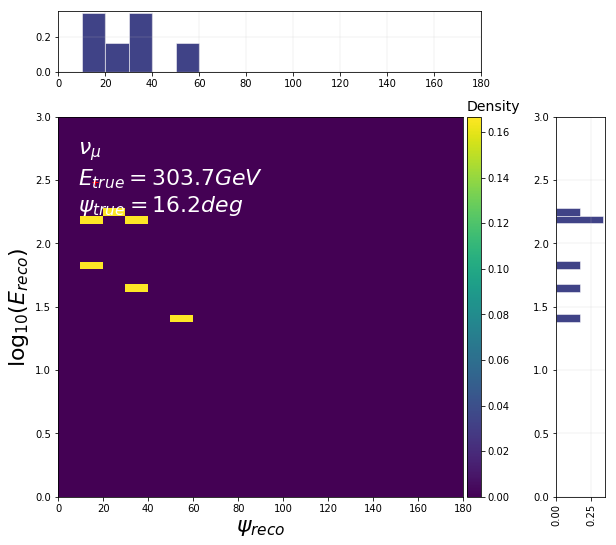

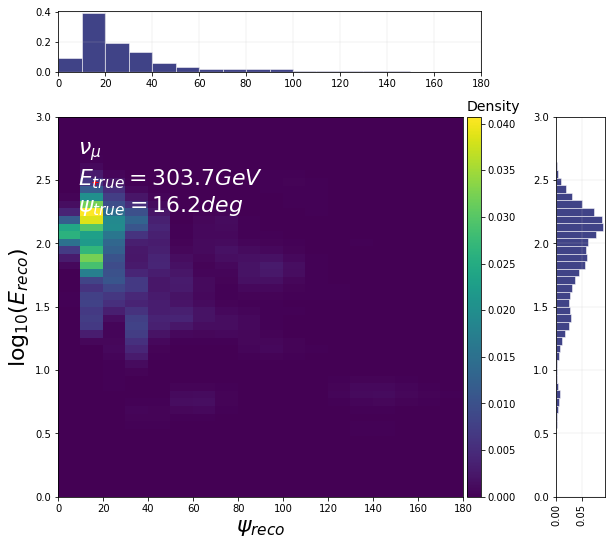

In [210]:
plot_Resolution(Resobin_norm[4, 30, 0:18, 0:50], Psitrue_center[4], np.log10(Etrue_center[30]),  np.array([Psireco_edges, np.log10(Ereco_edges)]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", 
            r"$\nu_\mu$" "\n" r"$E_{true}=303.7 GeV$" "\n" r"$\psi_{true}=16.2 deg$")
plot_Resolution(Reso_kde['nu_mu'][4, 30, 0:18, 0:50], Psitrue_center[4], np.log10(Etrue_center[30]) ,np.array([Psireco_edges, np.log10(Ereco_edges)]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", 
            r"$\nu_\mu$" "\n" r"$E_{true}=303.7 GeV$" "\n" r"$\psi_{true}=16.2 deg$")


In [212]:
Etrue_center[30]-Etrue_center[29]
Psitrue_center[4]-Psitrue_center[3]

3.599999999999998

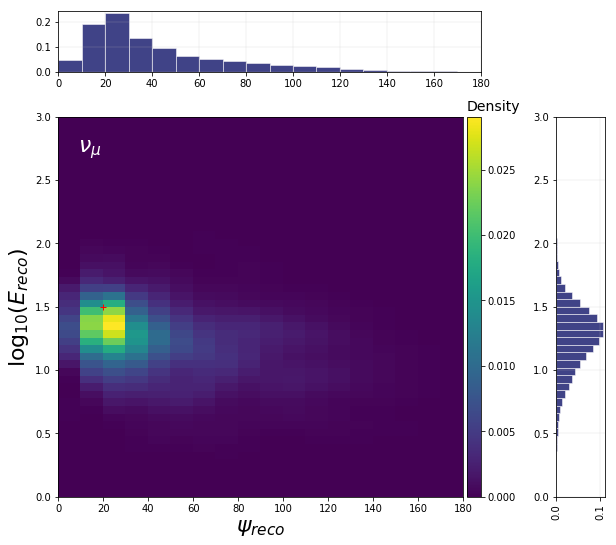

In [79]:
plot_Resolution(Reso_kde['nu_mu_bar'][5, 3, 0:18, 0:50], Psitrue_center[5], np.log10(Etrue_center[3]) ,np.array([Psireco_edges, np.log10(Ereco_edges)]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", r"$\nu_\mu$")


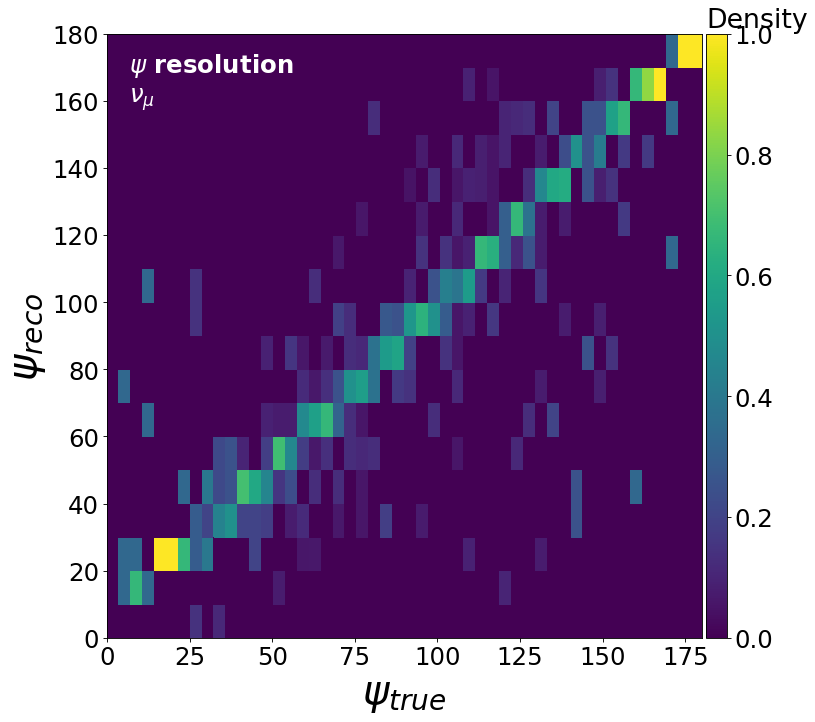

In [8]:
psi_reso = np.zeros((50, 18))
ietrue = 50
for j in range(0, 50):
    psi_reso += Resobin_norm[0:50, ietrue, 0:18, j]
# psi_reso += Resobin_norm[0:50, ietrue, 0:18, 25]
plot_2DHist(psi_reso, np.array([Psitrue_edges, Psireco_edges]), r"$\psi_{true}$", r"$\psi_{reco}$", r"$\psi$ resolution" "\n" r"$\nu_\mu$")

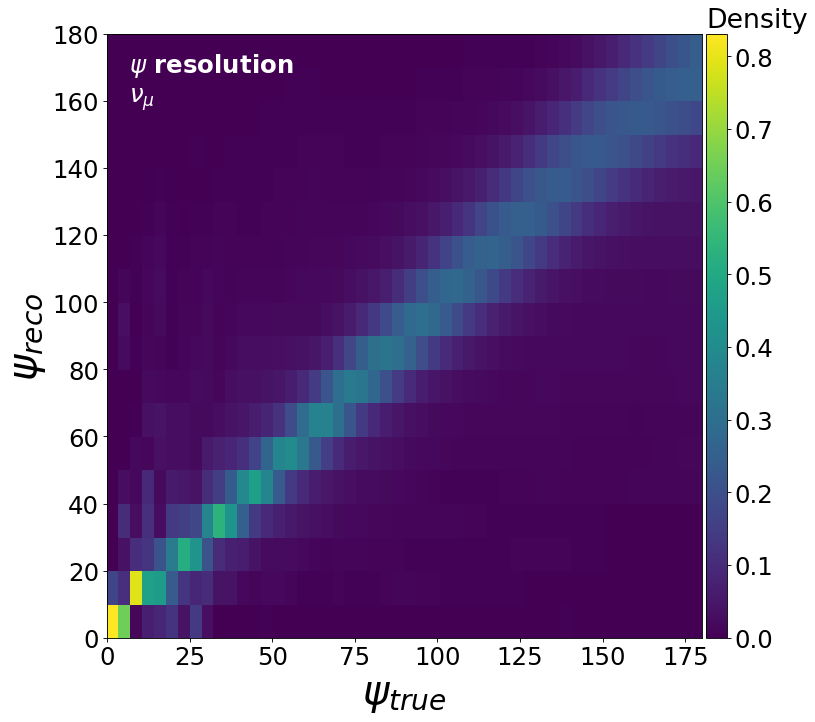

In [10]:
psi_reso = np.zeros((50, 18))
ietrue = 50
for j in range(0, 50):
    psi_reso += Reso_kde['nu_mu'][0:50, ietrue, 0:18, j]
# psi_reso += Reso_kde['nu_mu'][0:50, ietrue, 0:18, 25]
plot_2DHist(psi_reso, np.array([Psitrue_edges, Psireco_edges]), r"$\psi_{true}$", r"$\psi_{reco}$", r"$\psi$ resolution" "\n" r"$\nu_\mu$")

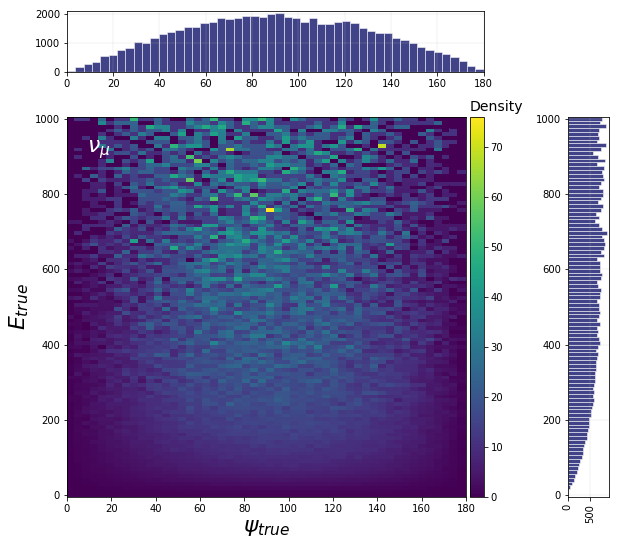

In [12]:
# Binned effective area

Effbin, xedges, yedges = np.histogram2d(psitrue, Etrue, bins=(Psitrue_edges, Etrue_edges), weights=weight)

plot_projections(Effbin, np.array([Psitrue_edges, Etrue_edges]), r"$\psi_{true}$", r"$E_{true}$", r"$\nu_\mu$")


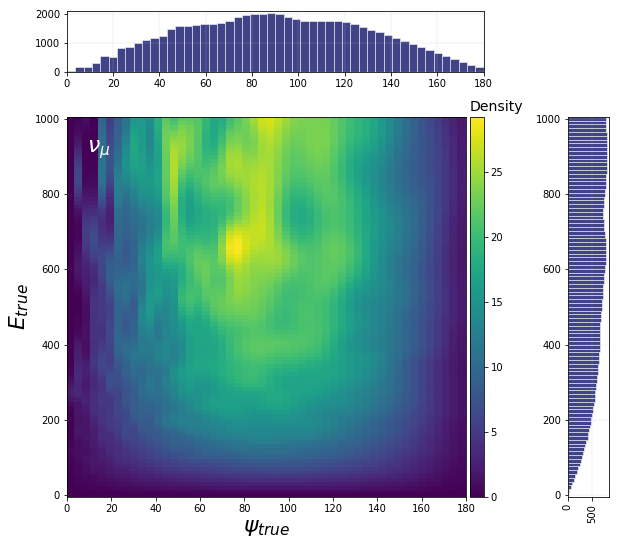

In [13]:
Eff = pkl.load(open("../DetResponse/PreComp/EtrueSplitted/eff/EffArea_kde_bwscott_nu_mu_nopid_Etrue_0_99.pkl", "rb"))
E_width = Etrue_edges[1]-Etrue_edges[0]
psi_width = Psitrue_edges[1]-Psitrue_edges[0]

plot_projections(Eff['Eff']* np.sum(Effbin)/np.sum(Eff['Eff']), np.array([Psitrue_edges, Etrue_edges]), r"$\psi_{true}$", r"$E_{true}$", r"$\nu_\mu$")

In [287]:
channel = 'numunumu'
# channel = 'bb'

mass = 600
# Binning:
# E true
Etrue_center = np.linspace(1., mass, 100)
Ewidth = (mass-1.)/(100.-1.)
Etrue_edges = np.array([E - Ewidth/2. for E in Etrue_center])
Etrue_edges = np.append(Etrue_edges, Etrue_center[-1] + Ewidth/2.)
# Psi true
Psitrue_edges = np.linspace(0, 180, 51)
Psiwidth = 180./50.
Psitrue_center = np.array([Psitrue_edges[i]+Psiwidth/2. for i in range(len(Psitrue_edges)-1)])
# E reco
Ereco_edges = pow(10., np.linspace(np.log10(1.), np.log10(1e3), 50+1))
Ereco_center = np.array([np.sqrt(Ereco_edges[i]*Ereco_edges[i+1]) for i in range(len(Ereco_edges) - 1)])
# Psi reco
Psireco_edges = np.linspace(0., 180., 18+1)
Psireco_center = np.array( [(Psireco_edges[i]+Psireco_edges[i+1])/2. for i in range(len(Psireco_edges)-1)] )

# PID
PID_edges = np.array([0.,0.5,0.85,1.])
PID_center = np.array( [(PID_edges[i]+PID_edges[i+1])/2. for i in range(len(PID_edges)-1)] )

Bin_eval = GroupBinning(Etrue_edges, Psitrue_edges, Etrue_center, Psitrue_center,
                Ereco_edges, Psireco_edges, Ereco_center, Psireco_center, PID_edges, PID_center)

In [294]:
# Extract precompute spectra
pathSpectra="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/Spectra_ann_Charon_atEarth_nocut.pkl"

# pathSpectra="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/Spectra_ann_PPPC4_atEarth.pkl"


# Precomputed Jfactor:
pathJfactor="/data/user/tchau/Sandbox/GC_OscNext/Spectra/PreComp/JFactor_NFW.pkl"
# True spectra:
Jfactor = Interpolate_Jfactor(pathJfactor, Psitrue_center)
# Spectra:
Spectra = Interpolate_Spectra(pathSpectra, Etrue_center, channel, mass)


# Compute the rate as Spectra x Jfactor
Rate = TrueRate(Spectra, Jfactor)
Rate['nu_mu'].shape

(50, 100)

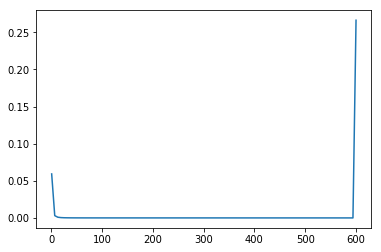

In [295]:
plt.plot(Etrue_center, Spectra['nu_mu'])

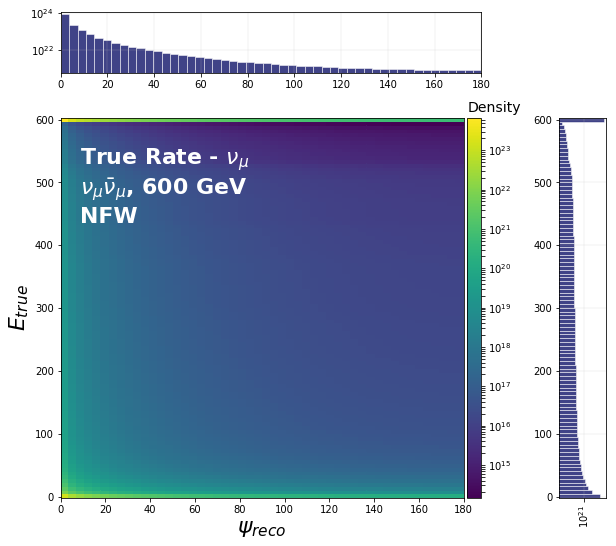

In [301]:
plot_projections(Rate['nu_mu'], np.array([Psitrue_edges, Etrue_edges]), r"$\psi_{reco}$", r"$E_{true}$", "True Rate - " r"$\nu_\mu$" "\n"r"$\nu_\mu \bar{\nu}_\mu$, 600 GeV" "\n" "NFW", zlogscale=True)

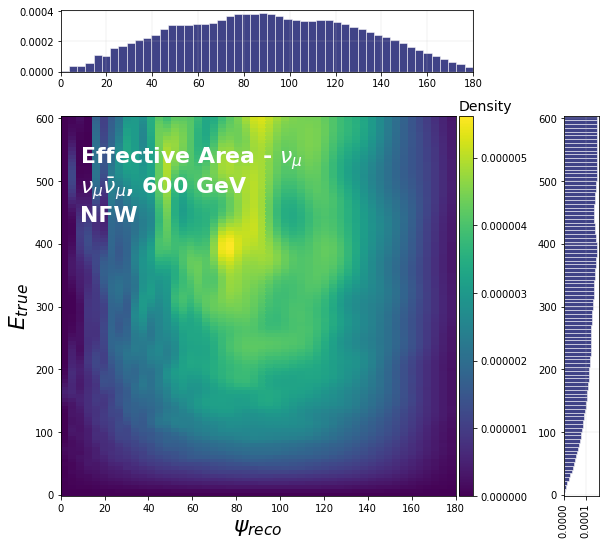

In [304]:
Eff = pkl.load(open("../DetResponse/PreComp/EtrueSplitted/eff/EffArea_kde_bwscott_{}_nopid_Etrue_0_99.pkl".format('nu_mu'), "rb"))
Eff_int = RegularGrid_2D((Bin["true_psi_center"], Bin["true_energy_center"]), Eff['Eff'], (Bin["true_psi_center"], Bin["true_energy_center"]))

plot_projections(Eff_int, np.array([Psitrue_edges, Etrue_edges]), r"$\psi_{reco}$", r"$E_{true}$", "Effective Area - " r"$\nu_\mu$" "\n"r"$\nu_\mu \bar{\nu}_\mu$, 600 GeV" "\n" "NFW", zlogscale=False)

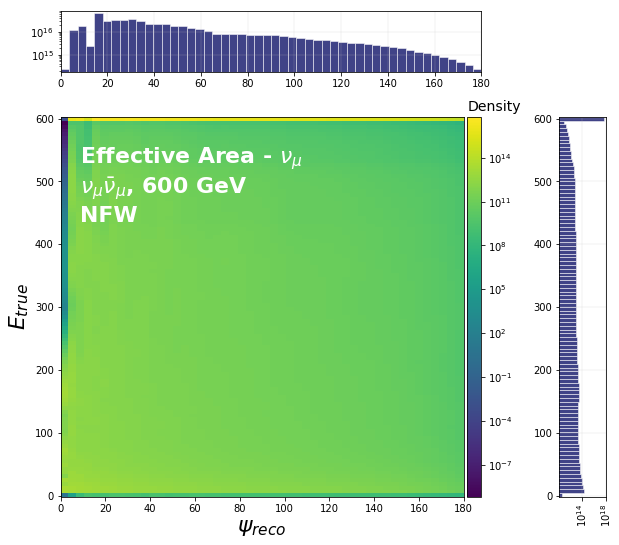

In [306]:
plot_projections(Eff_int *Rate['nu_mu'], np.array([Psitrue_edges, Etrue_edges]), r"$\psi_{reco}$", r"$E_{true}$", "Effective Area - " r"$\nu_\mu$" "\n"r"$\nu_\mu \bar{\nu}_\mu$, 600 GeV" "\n" "NFW", zlogscale=True)

In [289]:
# Interpolate to get response matrix at desired point:

nu_types = ["nu_e", "nu_mu", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]

Reco = np.zeros((18, 50))
for nutype in nu_types:
    # Reso_int = InterpolateResponseMatrix(Reso_kde[nutype], Bin, Bin_eval)
    # Eff = pkl.load(open("../DetResponse/PreComp/EtrueSplitted/eff/EffArea_kde_bwscott_{}_nopid_Etrue_0_99.pkl".format(nutype), "rb"))
    # Eff_int = RegularGrid_2D((Bin["true_psi_center"], Bin["true_energy_center"]), Eff['Eff'], (Bin_eval["true_psi_center"], Bin_eval["true_energy_center"]))

    Reso_int = InterpolateResponseMatrix(Reso_kde[nutype], Bin, Bin)
    Eff = pkl.load(open("../DetResponse/PreComp/EtrueSplitted/eff/EffArea_kde_bwscott_{}_nopid_Etrue_0_99.pkl".format(nutype), "rb"))
    Eff_int = RegularGrid_2D((Bin["true_psi_center"], Bin["true_energy_center"]), Eff['Eff'], (Bin["true_psi_center"], Bin["true_energy_center"]))

    Rateeff = Eff_int * Rate[nutype]
    RecoRate = np.tensordot(Reso_int, Rateeff, axes=([0,1], [0,1]))
    Reco+=RecoRate



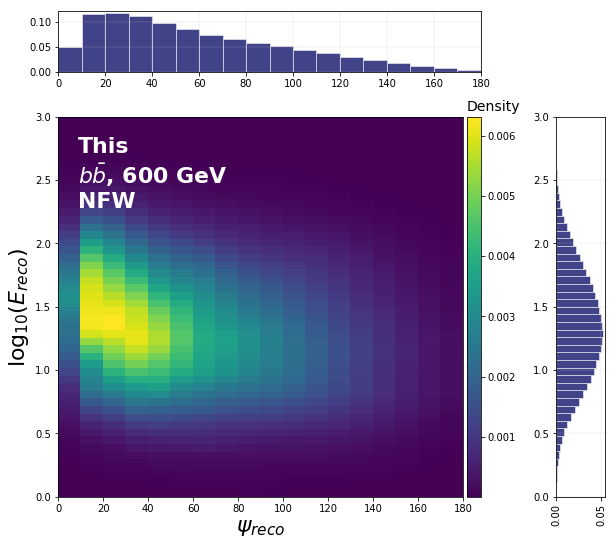

In [272]:

plot_projections(Reco/np.sum(Reco), np.array([Psireco_edges, np.log10(Ereco_edges)]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", "This" "\n"r"$b \bar{b}$, 600 GeV" "\n" "NFW")

In [217]:
MCdict = ExtractMC(['140000', '120000', '160000'])
Rateevt = DetectedRate_evtbyevt_nopid(MCdict, pathSpectra, pathJfactor, channel, mass, Bin)
    

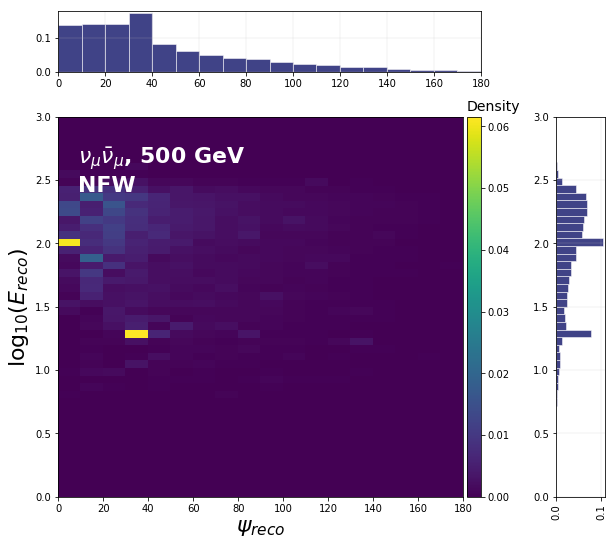

In [220]:
plot_projections(Rateevt/np.sum(Rateevt), np.array([Psireco_edges, np.log10(Ereco_edges)]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", r"$\nu_\mu \bar{\nu}_\mu$, 500 GeV" "\n" "NFW")

In [114]:
Rateevt.shape

(3, 18, 50)

In [119]:
Bin_eval["true_energy_center"]

array([  1.        ,   9.07070707,  17.14141414,  25.21212121,
        33.28282828,  41.35353535,  49.42424242,  57.49494949,
        65.56565657,  73.63636364,  81.70707071,  89.77777778,
        97.84848485, 105.91919192, 113.98989899, 122.06060606,
       130.13131313, 138.2020202 , 146.27272727, 154.34343434,
       162.41414141, 170.48484848, 178.55555556, 186.62626263,
       194.6969697 , 202.76767677, 210.83838384, 218.90909091,
       226.97979798, 235.05050505, 243.12121212, 251.19191919,
       259.26262626, 267.33333333, 275.4040404 , 283.47474747,
       291.54545455, 299.61616162, 307.68686869, 315.75757576,
       323.82828283, 331.8989899 , 339.96969697, 348.04040404,
       356.11111111, 364.18181818, 372.25252525, 380.32323232,
       388.39393939, 396.46464646, 404.53535354, 412.60606061,
       420.67676768, 428.74747475, 436.81818182, 444.88888889,
       452.95959596, 461.03030303, 469.1010101 , 477.17171717,
       485.24242424, 493.31313131, 501.38383838, 509.45

In [120]:
Bin["true_energy_center"]

array([   1.        ,   11.09090909,   21.18181818,   31.27272727,
         41.36363636,   51.45454545,   61.54545455,   71.63636364,
         81.72727273,   91.81818182,  101.90909091,  112.        ,
        122.09090909,  132.18181818,  142.27272727,  152.36363636,
        162.45454545,  172.54545455,  182.63636364,  192.72727273,
        202.81818182,  212.90909091,  223.        ,  233.09090909,
        243.18181818,  253.27272727,  263.36363636,  273.45454545,
        283.54545455,  293.63636364,  303.72727273,  313.81818182,
        323.90909091,  334.        ,  344.09090909,  354.18181818,
        364.27272727,  374.36363636,  384.45454545,  394.54545455,
        404.63636364,  414.72727273,  424.81818182,  434.90909091,
        445.        ,  455.09090909,  465.18181818,  475.27272727,
        485.36363636,  495.45454545,  505.54545455,  515.63636364,
        525.72727273,  535.81818182,  545.90909091,  556.        ,
        566.09090909,  576.18181818,  586.27272727,  596.36363

In [48]:
spectra_PPPC4 = pkl.load(open("../Spectra/PreComp/Spectra_ann_PPPC4_atEarth.pkl", "rb"))
spectra_Charon = pkl.load(open("../Spectra/PreComp/Spectra_ann_Charon_atEarth_nocut.pkl", "rb"))

[]

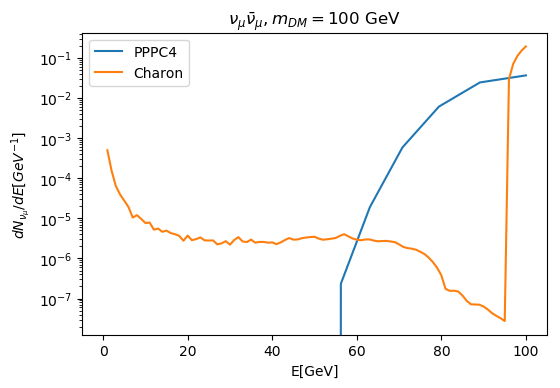

In [102]:
plt.rcParams['figure.dpi']= 100

plt.plot(spectra_PPPC4['numunumu']['100']['nu_mu']['E'], spectra_PPPC4['numunumu']['100']['nu_mu']['dNdE'], label='PPPC4')
plt.plot(spectra_Charon['numunumu']['100']['nu_mu']['E'], spectra_Charon['numunumu']['100']['nu_mu']['dNdE'], label='Charon')
plt.xlabel('E[GeV]')
plt.ylabel(r'$dN_{\nu_\mu}/dE[GeV^{-1}]$')
plt.title(r'$\nu_\mu \bar{\nu}_\mu, m_{DM} = 100$ GeV')
plt.legend()
plt.semilogy()
# plt.semilogx()
# plt.xlim(1, 100)


In [41]:
spectra_PPPC4['numunumu']['100'].keys()

dict_keys(['nu_mu', 'nu_e', 'nu_tau'])

In [116]:
# Building binned Resolution:
MCdict = ExtractMC(['140000', '120000', '160000'])
# track
# loc = np.where((MCdict['nutype']>0.))
psitrue = MCdict["psi_true"]
Etrue = MCdict["E_true"]
psireco = MCdict["psi_reco"]
Ereco = MCdict["E_reco"]
weight = MCdict["w"]

Hreco = np.histogram2d(psireco, Ereco,
                                           bins = (Psireco_edges, Ereco_edges))

In [137]:
Htrue = np.histogram2d(psitrue, Etrue,
                                           bins = (Psireco_edges, Ereco_edges))

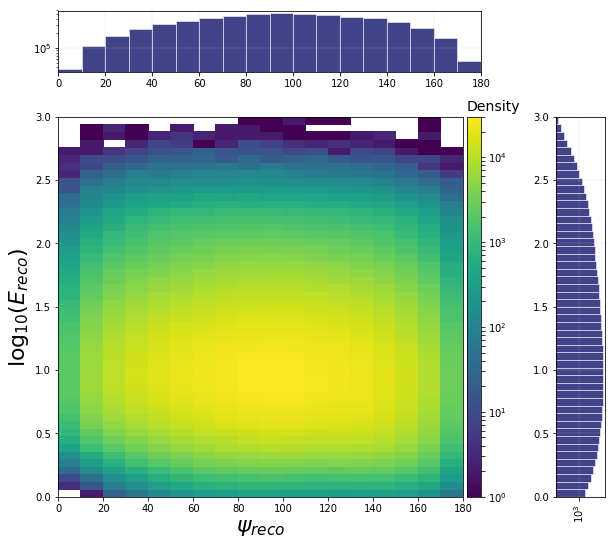

In [133]:
plot_projections(Hreco[0], np.array([Psireco_edges, np.log10(Ereco_edges)]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", "", zlogscale=True)

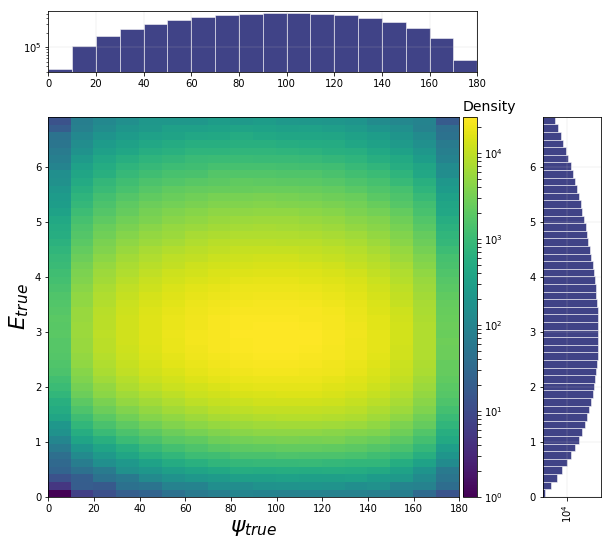

In [139]:
plot_projections(Htrue[0], np.array([Psireco_edges, np.log(Ereco_edges)]), r"$\psi_{true}$", r"$E_{true}$", "", zlogscale=True)

In [224]:
# Accessing Nadege's result:
file1 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded_newCuts.pkl"
file2 = "OscNext_L7_v02.00_1X0000_PDF_Signal_PID3_psi18_E50_sklearnKDEappliedfromReco_0.03Bandwidth_RemovedHighWeightEventTrue_PostCutFinalL7_PPPC4Spectra_PredefinedBinning_UncertaintyIncluded.pkl"

nadege1 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file1), "rb"))
nadege2 = pkl.load(open("/data/user/niovine/projects/DarkMatter_OscNext/Histograms/Signal/PPPC4/{}".format(file2), "rb"))


In [233]:
nadege1['NFW_numunumu_600'].keys()

dict_keys(['PDF', 'PDF_norm', 'PDF_quad', 'Ntot', 'edges', 'bw'])

In [278]:
Nad = nadege2['NFW_numunumu_600']['PDF']
pdf_nadege = Nad[0] +  Nad[1] +  Nad[2]



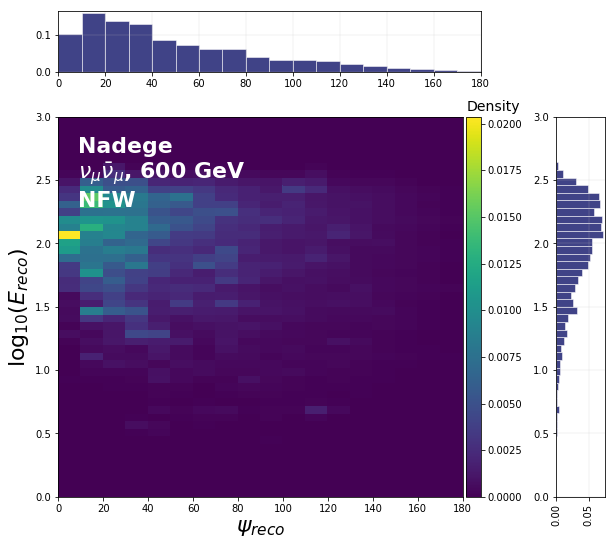

In [279]:
plot_projections(pdf_nadege/np.sum(pdf_nadege), np.array([Psireco_edges, np.log10(Ereco_edges)]), r"$\psi_{reco}$", r"log$_{10}(E_{reco})$", r"Nadege" "\n" r"$\nu_\mu \bar{\nu}_\mu$, 600 GeV" "\n" "NFW")